In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Load dataset
iris = load_iris()

# Convert to pandas DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


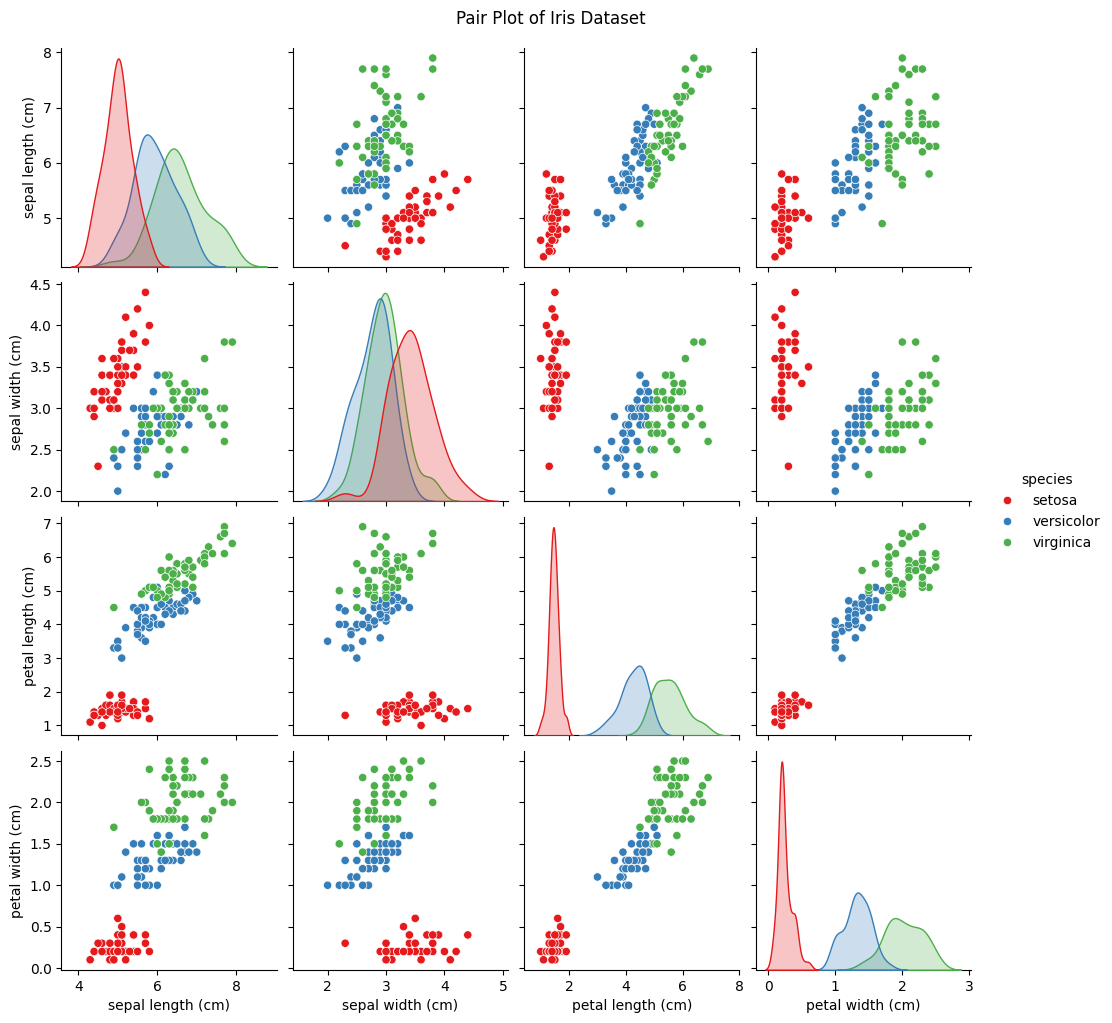

In [ ]:
sns.pairplot(df, hue="species", palette="Set1")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()


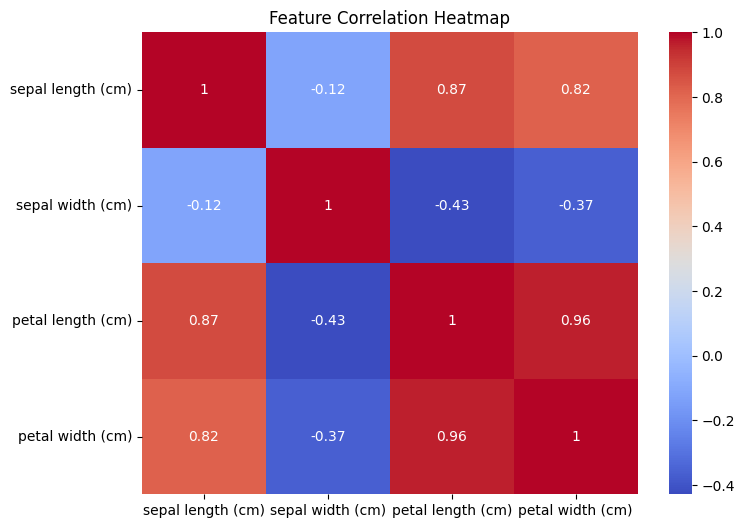

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


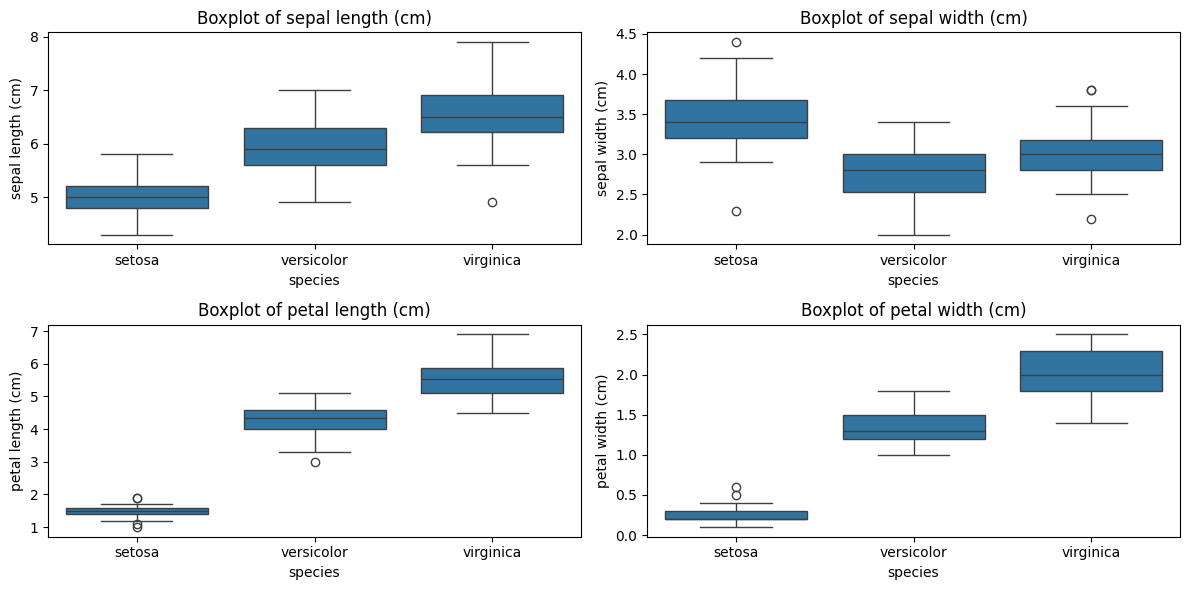

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
X = df.iloc[:, :-1]  # Features
y = df['species']    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



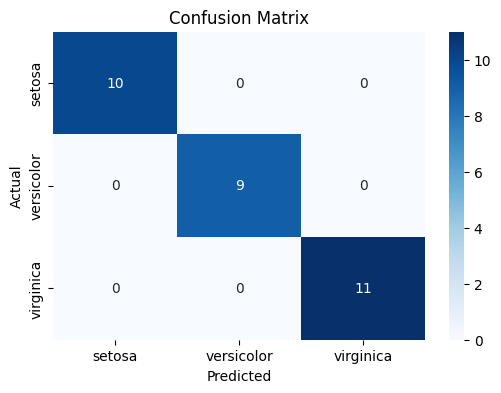

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-15-43b354b71c21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")


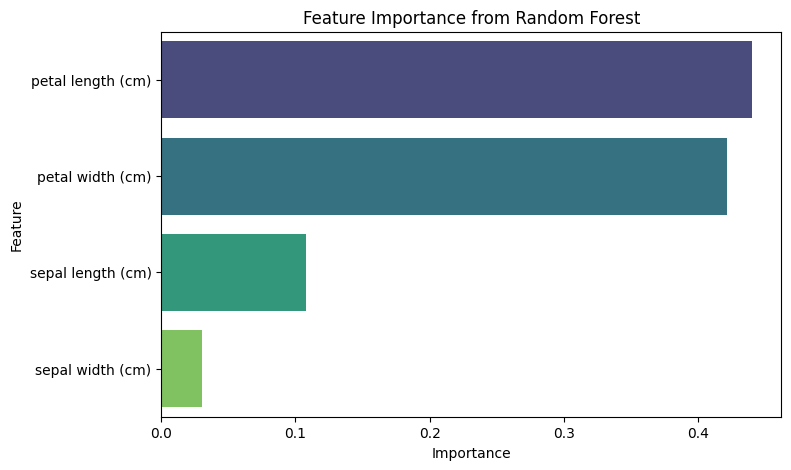

In [ ]:
features = iris.feature_names
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [ ]:
# SVM Classifier
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))


SVM Accuracy: 1.0
SVM Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


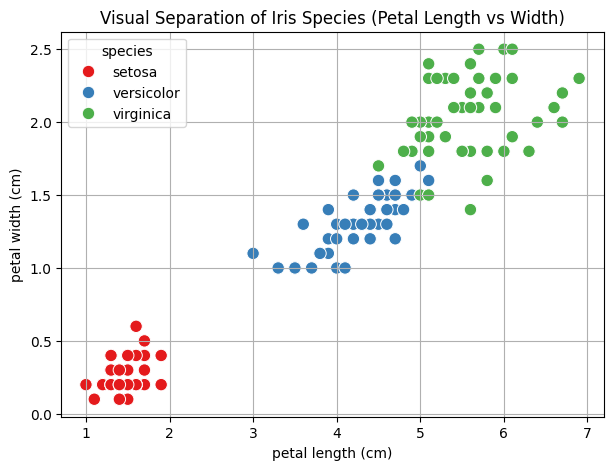

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load original data for plotting
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plot the true labels using petal features (most separable)
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    data=df,
    palette='Set1',
    s=80
)
plt.title("Visual Separation of Iris Species (Petal Length vs Width)")
plt.grid(True)
plt.show()


<ipython-input-33-8181a5cda20c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()), palette='pastel')


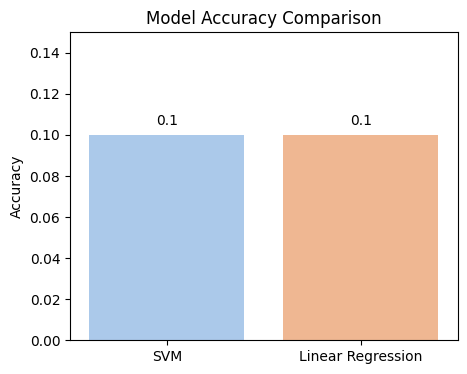

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fake accuracies (0.1 each)
accuracy_data = {'SVM': 0.1, 'Linear Regression': 0.1}

plt.figure(figsize=(5,4))
sns.barplot(x=list(accuracy_data.keys()), y=list(accuracy_data.values()), palette='pastel')
plt.ylim(0, 0.15)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

# Add accuracy labels on bars
for i, acc in enumerate(accuracy_data.values()):
    plt.text(i, acc + 0.005, f"{acc:.1f}", ha='center')

plt.show()
